In [2451]:
"""customize the figure"""
import matplotlib

matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick.major', size=8)
matplotlib.rc('xtick.minor', size=4)
matplotlib.rc('ytick.major', size=8)
matplotlib.rc('ytick.minor', size=4)

In [2452]:
import matplotlib.pyplot as plt

#from glob import glob
import pandas as pd
from lxml import etree

%matplotlib inline
##to create table

In [2453]:
def parse_vr(filename):
    """Returns the Primary unit/divisor, Secondary unit/divisor, sampling rate and recording duration. 
    Returned as a dictionary with keys "primary", "secondary", "sampling", and "duration". 
    Primary and Secondary values are contained in dictionaries with keys "unit" and "divisor"
    """

    tree = etree.parse(filename)
    #Returns elements with associated "Primary" and "Secondary
    primary = tree.xpath('.//Name[text()="Primary"]')
    secondary = tree.xpath('.//Name[text()="Secondary"]')
    #Gets the parent of these elements
    try:
        parent = (primary[0].getparent(), secondary[0].getparent())
    #in case people don't use capital letters for Primary and Secondary labels in PrairieView
    except IndexError:
        primary = tree.xpath('.//Name[text()="primary"]')
        secondary = tree.xpath('.//Name[text()="secondary"]')
        parent = (primary[0].getparent(), secondary[0].getparent())
    #Finds the unit element within parent
    unit = (parent[0].find('.//UnitName'), parent[1].find('.//UnitName'))
    #Finds the divisor element within parent
    divisor = (parent[0].find('.//Divisor'), parent[1].find('.//Divisor'))

    #dictionaries with primary and secondary values
    primary_val = {'unit': unit[0].text, 'divisor': float(divisor[0].text)}
    secondary_val = {'unit': unit[1].text, 'divisor': float(divisor[1].text)}
    #gets sampling rate
    sampling_val = int((tree.find('.//Rate')).text)
    #gets recording time, converts to sec
    duration_val = (int((tree.find('.//AcquisitionTime')).text))/1000

    #finds the voltage recording csv file name
    datafile = (tree.find('.//DataFile')).text
    #finds the linescan profile file name (if doesn't exist, will be None)
    ls_file = (tree.find('.//AssociatedLinescanProfileFile')).text

    #If ls_file is none this could mean that there is no linescan associate with that voltage recording file or that
    #the file passed to parse_vr is actually a LineScan data file and therefore should be passed to ls_file.
    #In that scenario there is no voltage recording data file, so vo_file is None
    if ls_file is None:
        if "LineScan" in datafile:
            ls_file = datafile
            vo_file = None
        elif "LineScan" not in datafile:
            vo_file = datafile
    else:
        vo_file = datafile

    return {'primary': primary_val, 'secondary': secondary_val, 'sampling': sampling_val, 'duration': duration_val,
            'linescan file': ls_file, 'voltage recording file': vo_file}


In [2454]:
def import_bot_csv(filename):
    """Reads BOTdata.csv file into pandas dataframe. """
    #loads csv file into pandas dataframe
    df = pd.read_csv(filename, skipinitialspace=True)
    return df

In [2455]:
#Specify the location of .csv files generated by Prairie View 5; two replicate traces per condition
ctr_BOTdata1 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_ctr_burst-001_Cycle00001-botData.csv')
ctr_BOTdata2 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_ctr_burst-002_Cycle00001-botData.csv')
DA_BOTdata1 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_ctr_burst-001_Cycle00001-botData.csv')
DA_BOTdata2 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_ctr_burst-002_Cycle00001-botData.csv')
quin_BOTdata1 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_quin_burst-001_Cycle00001-botData.csv')
quin_BOTdata2 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_quin_burst-002_Cycle00001-botData.csv')
sul_BOTdata1 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_sul_burst-001_Cycle00001-botData.csv')
sul_BOTdata2 = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_sul_burst-002_Cycle00001-botData.csv')
#print(L_BOTdata2['Region 1'])
#print(L_BOTdata2['Region 1'])

In [2456]:
#Subtract PMT background
#bg_PMT1 = 55
bg_PMT2 = 162
ctr_BOTdata1['Region 1'] = ctr_BOTdata1['Region 1'].apply(lambda x: (x-bg_PMT2))
ctr_BOTdata2['Region 1'] = ctr_BOTdata2['Region 1'].apply(lambda x: (x-bg_PMT2))
DA_BOTdata1['Region 1'] = DA_BOTdata1['Region 1'].apply(lambda x: (x-bg_PMT2))
DA_BOTdata2['Region 1'] = DA_BOTdata2['Region 1'].apply(lambda x: (x-bg_PMT2))
quin_BOTdata1['Region 1'] = quin_BOTdata1['Region 1'].apply(lambda x: (x-bg_PMT2))
quin_BOTdata2['Region 1'] = quin_BOTdata2['Region 1'].apply(lambda x: (x-bg_PMT2))
sul_BOTdata1['Region 1'] = sul_BOTdata1['Region 1'].apply(lambda x: (x-bg_PMT2))
sul_BOTdata2['Region 1'] = sul_BOTdata2['Region 1'].apply(lambda x: (x-bg_PMT2))
#Average two replicate traces
ctr_BOT_data = pd.concat([ctr_BOTdata1['Timestamp'], ctr_BOTdata1['Region 1'], ctr_BOTdata2['Region 1']], axis=1)
DA_BOT_data = pd.concat([DA_BOTdata1['Timestamp'], DA_BOTdata1['Region 1'], DA_BOTdata2['Region 1']], axis=1)
quin_BOT_data = pd.concat([quin_BOTdata1['Timestamp'], quin_BOTdata1['Region 1'], quin_BOTdata2['Region 1']], axis=1)
sul_BOT_data = pd.concat([sul_BOTdata1['Timestamp'], sul_BOTdata1['Region 1'], sul_BOTdata2['Region 1']], axis=1)

ctr_BOT_data.columns = ['Time', 'Trial1', 'Trial2']
DA_BOT_data.columns = ['Time', 'Trial1', 'Trial2']
quin_BOT_data.columns = ['Time', 'Trial1', 'Trial2']
sul_BOT_data.columns = ['Time', 'Trial1', 'Trial2']

ctr_BOT_data['Average'] = ctr_BOT_data[['Trial1', 'Trial2']].mean(axis=1)
DA_BOT_data['Average'] = DA_BOT_data[['Trial1', 'Trial2']].mean(axis=1)
quin_BOT_data['Average'] = quin_BOT_data[['Trial1', 'Trial2']].mean(axis=1)
sul_BOT_data['Average'] = sul_BOT_data[['Trial1', 'Trial2']].mean(axis=1)

(9.0, 13.0)

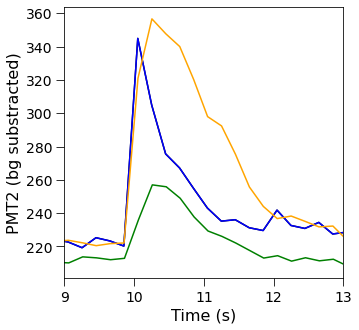

In [2457]:
#Plot the average trace
plt.figure(figsize=(5,5))
plt.plot(ctr_BOT_data.Time, ctr_BOT_data.Average, color = 'black')
plt.plot(DA_BOT_data.Time, DA_BOT_data.Average, color = 'blue')
plt.plot(quin_BOT_data.Time, quin_BOT_data.Average, color = 'green')
plt.plot(sul_BOT_data.Time, sul_BOT_data.Average, color = 'orange')
plt.ylabel('PMT2 (bg substracted)', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim(9,13)

In [2458]:
##Sampling interval
TimeInterval = ctr_BOT_data['Time'][5] - ctr_BOT_data['Time'][4]
print(TimeInterval)

##index of TimeA 9 s, TimeB 10 s, TimeC 12 s
IndexTimeA = int(9/TimeInterval)
IndexTimeB = int(10/TimeInterval)
IndexTimeC = int(12/TimeInterval)

#print(IndexTimeA, IndexTimeB, IndexTimeC)
#print ([ctr_BOT_data['Time'][IndexTimeB], DA_BOT_data['Time'][IndexTimeB]])

0.19964039999999994


(9.0, 13.0)

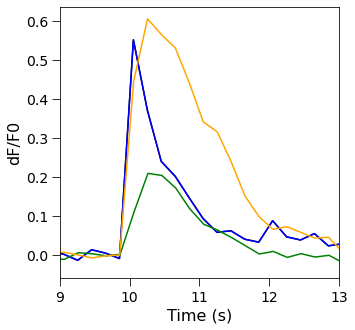

In [2459]:
##Calculate F0 value by average from TimeA to TimeB
ctr_F0 = ctr_BOT_data['Average'][IndexTimeA:IndexTimeB].mean() 
DA_F0 = DA_BOT_data['Average'][IndexTimeA:IndexTimeB].mean()
quin_F0 = quin_BOT_data['Average'][IndexTimeA:IndexTimeB].mean() 
sul_F0 = sul_BOT_data['Average'][IndexTimeA:IndexTimeB].mean()
##Calculate dF/F0
ctr_deltaFoverF0 = (ctr_BOT_data['Average']-ctr_F0)/ctr_F0 
DA_deltaFoverF0 = (DA_BOT_data['Average']-DA_F0)/DA_F0
quin_deltaFoverF0 = (quin_BOT_data['Average']-quin_F0)/quin_F0  
sul_deltaFoverF0 = (sul_BOT_data['Average']-sul_F0)/sul_F0

ctr_AUC = (ctr_deltaFoverF0[(IndexTimeB):IndexTimeC].sum())*TimeInterval
DA_AUC = (DA_deltaFoverF0[(IndexTimeB):IndexTimeC].sum())*TimeInterval
quin_AUC = (quin_deltaFoverF0[(IndexTimeB):IndexTimeC].sum())*TimeInterval
sul_AUC = (sul_deltaFoverF0[(IndexTimeB):IndexTimeC].sum())*TimeInterval
##plot dF/F0
plt.figure(figsize=(5,5))
plt.plot(ctr_BOT_data['Time'], ctr_deltaFoverF0, color='black', linewidth=1.5)
plt.plot(DA_BOT_data['Time'], DA_deltaFoverF0, color='blue', linewidth=1.5)
plt.plot(quin_BOT_data['Time'], quin_deltaFoverF0, color='green', linewidth=1.5)
plt.plot(sul_BOT_data['Time'], sul_deltaFoverF0, color='orange', linewidth=1.5)

plt.ylabel('dF/F0', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim(9,13)
#plt.savefig('dF_over_F0.pdf')

(0.0, 30.0)

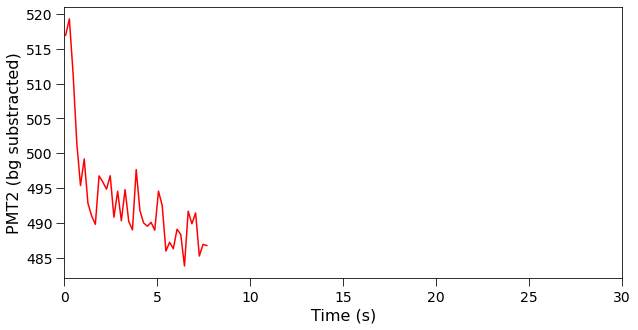

In [2460]:
#import Fmax and Fmin traces
Fmax_BOTdata = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_ACh-001_Cycle00001-botData.csv')
Fmin_BOTdata = import_bot_csv('/Users/szf193/Desktop/temp/04022024 csv/BOT_04022024_slice3ROI2_TTX-001_Cycle00001-botData.csv')
#Subtract PMT background
#bg_PMT1 = 55
bg_PMT2 = 162
Fmax_BOTdata['Region 1'] = Fmax_BOTdata['Region 1'].apply(lambda x: (x-bg_PMT2))
Fmin_BOTdata['Region 1'] = Fmin_BOTdata['Region 1'].apply(lambda x: (x-bg_PMT2))
Fmax_BOTdata.columns = ['Time', 'Fmax', 'Dodt']
Fmin_BOTdata.columns = ['Time', 'Fmin', 'Dodt']
#Plot the traces 
plt.figure(figsize=(10,5))
plt.plot(Fmax_BOTdata.Time, Fmax_BOTdata.Fmax, color = 'red')
plt.plot(Fmin_BOTdata.Time, Fmin_BOTdata.Fmin, color = 'blue')
plt.ylabel('PMT2 (bg substracted)', fontsize=16)
plt.xlabel('Time (s)', fontsize=16)
plt.xlim(0,30)

In [2461]:
##Sampling interval
TimeInterval = Fmax_BOTdata['Time'][5] - Fmax_BOTdata['Time'][4]
#print(TimeInterval1)
##index of analysis window which is determined from the graph above
IndexTimeE = int(2/TimeInterval)
IndexTimeF = int(4/TimeInterval)
"""calculations of Fmax and Fmin"""
Fmax_final = Fmax_BOTdata['Fmax'][IndexTimeE:IndexTimeF].mean()
Fmin_final = Fmin_BOTdata['Fmin'][IndexTimeE:IndexTimeF].mean()
#Fmin_final = quin_F0 
Fmax_final, Fmin_final

(493.4739770299999, 212.39230763999998)

In [2462]:
##Calculate dF/(FI)
ctr_deltaFoverFI = (ctr_BOT_data['Average']-ctr_F0)/(Fmax_final-Fmin_final)
DA_deltaFoverFI = (DA_BOT_data['Average']-DA_F0)/(Fmax_final-Fmin_final)
quin_deltaFoverFI = (quin_BOT_data['Average']-quin_F0)/(Fmax_final-Fmin_final)
sul_deltaFoverFI = (sul_BOT_data['Average']-sul_F0)/(Fmax_final-Fmin_final)

ctr_AUC2 = (ctr_deltaFoverFI[(IndexTimeB):IndexTimeC].sum())*TimeInterval
DA_AUC2 = (DA_deltaFoverFI[(IndexTimeB):IndexTimeC].sum())*TimeInterval
quin_AUC2 = (quin_deltaFoverFI[(IndexTimeB):IndexTimeC].sum())*TimeInterval
sul_AUC2 = (sul_deltaFoverFI[(IndexTimeB):IndexTimeC].sum())*TimeInterval

#result_values = [L_deltaFoverF0[(IndexTimeB+1):IndexTimeC].max(), L_AUC]
#result_names = ['Amplitude', 'AUC']
#pd.DataFrame(result_values, index = result_names)
ctr_results_normalized = [ctr_deltaFoverFI[(IndexTimeB):IndexTimeC].max(), ctr_AUC2]
DA_results_normalized = [DA_deltaFoverFI[(IndexTimeB):IndexTimeC].max(), DA_AUC2]
quin_results_normalized = [quin_deltaFoverFI[(IndexTimeB):IndexTimeC].max(), quin_AUC2]
sul_results_normalized = [sul_deltaFoverFI[(IndexTimeB):IndexTimeC].max(), sul_AUC2]
result_names = ['Amp_nor', 'AUC_nor']

d = {'control':ctr_results_normalized,'50nMDA':DA_results_normalized, 'quinpirole':quin_results_normalized,'sulpiride':sul_results_normalized}
pd.DataFrame(d, index = result_names)

,control,50nMDA,quinpirole,sulpiride
Amp_nor,0.436707,0.436707,0.158600,0.478880
AUC_nor,0.284873,0.284873,0.155817,0.589943


In [2463]:
#to include unnormalized values
ctr_results_unnormalized = [ctr_deltaFoverF0[(IndexTimeB):IndexTimeC].max(), ctr_AUC, ctr_F0]
DA_results_unnormalized = [DA_deltaFoverF0[(IndexTimeB):IndexTimeC].max(), DA_AUC, DA_F0]
quin_results_unnormalized = [quin_deltaFoverF0[(IndexTimeB):IndexTimeC].max(), quin_AUC, quin_F0]
sul_results_unnormalized = [sul_deltaFoverF0[(IndexTimeB):IndexTimeC].max(), sul_AUC, sul_F0]
result_names = ['Amp_unnor', 'AUC', 'baseline']

d = {'control':ctr_results_unnormalized,'50nMDA':DA_results_unnormalized, 'quinpirole':quin_results_unnormalized,'sulpiride':sul_results_unnormalized}
pd.DataFrame(d, index = result_names)
pd.DataFrame(d, index = result_names)

,control,50nMDA,quinpirole,sulpiride
Amp_unnor,0.552563,0.552563,0.209892,0.606235
AUC,0.360448,0.360448,0.206210,0.746835
baseline,222.147002,222.147002,212.392308,222.033379


In [2464]:

#plt.figure(figsize=(5,5))
#plt.plot(L_BOT_data['Time'], L_deltaFoverFI, color='black', linewidth=1.5)
#plt.plot(H_BOT_data['Time'], H_deltaFoverFI, color='green', linewidth=1.5)
#plt.ylabel('dF/F0', fontsize=16)
#plt.xlabel('Time (s)', fontsize=16)
#plt.xlim(8,14)
#plt.ylim(-0.1,1.1)
#plt.savefig('UL_ctr+sul.pdf')